In Statistics is all about working with data, be it processing, analyzing, or drawing a conclusion from the data we have. In the context of a given dataset, statistics has two main goals: describing the data, and drawing conclusions from it. These goals coincide with the two main categories of statistics — descriptive statistics and inferential statistics — respectively.

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
weather_df = pd.DataFrame({'temp': [55, 34, 80, 75, 53], 'weather': ['windy','cloudy','sunny','rainy','sunny']})
weather_df

,temp,weather
0,55,windy
1,34,cloudy
2,80,sunny
3,75,rainy
4,53,sunny


In [3]:
weather_df['weather_encoded'] = weather_df['weather'].map({'windy': 0, 'cloudy': 1, 'sunny': 2, 'rainy': 3})
weather_df

,temp,weather,weather_encoded
0,55,windy,0
1,34,cloudy,1
2,80,sunny,2
3,75,rainy,3
4,53,sunny,2


In [4]:
pd.get_dummies(weather_df['weather'])

,cloudy,rainy,sunny,windy
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,0,1,0,0
4,0,0,1,0


In terms of making predictions, if a categorical attribute is the target of our machine learning pipeline (as in, if we want to predict a categorical attribute), classification models are needed. As opposed to regression models, which make predictions on numerical, continuous data, classification models, or classifiers for short, keep in mind the possible values their target attribute can take and only predict among those values. Thus, when deciding which machine learning model(s) you should train on your dataset to predict categorical data, make sure to only use classifiers.

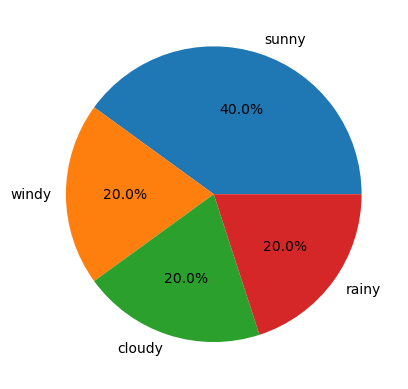

In [5]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [7]:
student_df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dan', 'Eli', 'Fran'],
                           'sex': ['female', 'male','female', 'male', 'male', 'female'],
                           'class': ['FY', 'SO', 'SR', 'SO',' JR', 'SR'],
                           'gpa': [90, 93, 97, 89, 95, 92],'num_classes': [4, 3, 4, 4, 3, 2]})
student_df

,name,sex,class,gpa,num_classes
0,Alice,female,FY,90,4
1,Bob,male,SO,93,3
2,Carol,female,SR,97,4
3,Dan,male,SO,89,4
4,Eli,male,JR,95,3
5,Fran,female,SR,92,2


A binary attribute, whose values can only be True and False, is a categorical attribute whose set of possible values contains the two Boolean values mentioned. Since Boolean values can be easily interpreted by machine learning and mathematical models, there is usually not a need to convert a binary attribute into any other form.

In [8]:
student_df['female_flag'] = student_df['sex'] == 'female'
student_df = student_df.drop('sex', axis=1)
student_df

,name,class,gpa,num_classes,female_flag
0,Alice,FY,90,4,True
1,Bob,SO,93,3,False
2,Carol,SR,97,4,True
3,Dan,SO,89,4,False
4,Eli,JR,95,3,False
5,Fran,SR,92,2,True


In [9]:
import seaborn as sns

In [10]:
weather_df = pd.read_csv('weather_data.csv')
weather_df.head()

,day,city,weather
0,0,St Louis,sunny
1,0,New York,cloudy
2,0,San Francisco,sunny
3,1,New York,rain
4,1,St Louis,cloudy


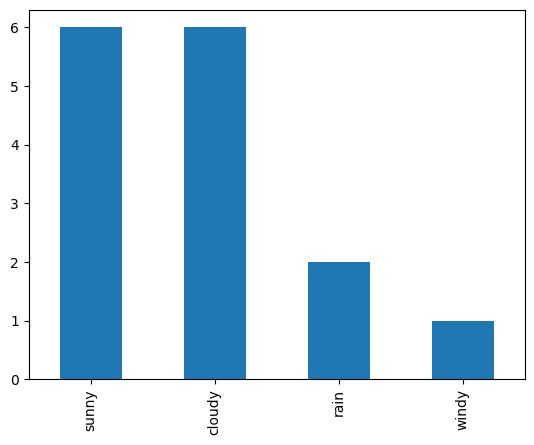

In [11]:
weather_df['weather'].value_counts().plot.bar()
plt.show()

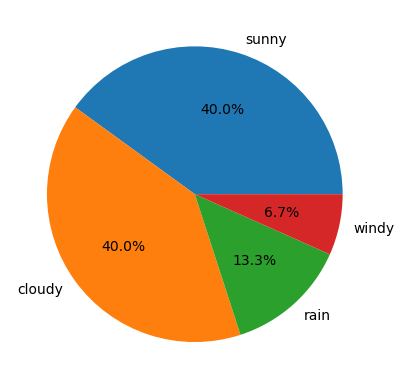

In [12]:
weather_df['weather'].value_counts().plot.pie(autopct='%1.1f%%')
plt.ylabel('')
plt.show()

In [13]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city')

city,New York,San Francisco,St Louis
weather,,,
cloudy,3.0,NaN,3.0
rain,1.0,NaN,1.0
sunny,1.0,4.0,1.0
windy,NaN,1.0,NaN


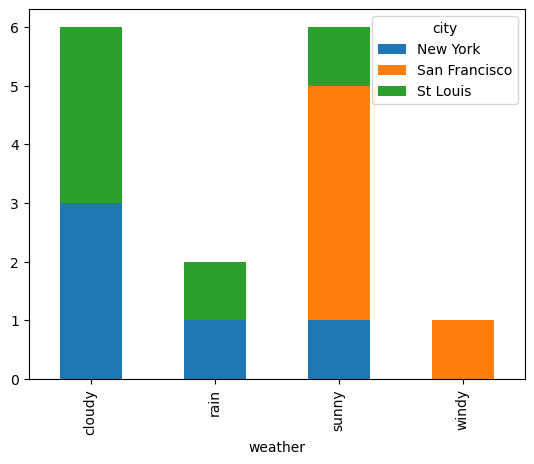

In [15]:
weather_df.groupby(['weather', 'city'])['weather'].count().unstack('city').fillna(0).plot(kind='bar', stacked=True) 
plt.show()